In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/colab/numeros/train.csv.zip', compression='zip')

In [4]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df_train.drop('label', axis=1)
Y = df_train['label']

In [6]:
X 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [10]:
np.sqrt(784)

28.0

In [21]:
def show_figure(posicao):
  img = X.iloc[posicao].values
  img = img.reshape((28, 28))
  plt.imshow(img, cmap='gray')
  plt.title(Y.iloc[posicao])
  plt.axis('off')
  plt.show()

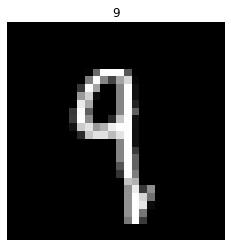

In [27]:
show_figure(85)

In [28]:
X = X.values.reshape(-1, 28, 28, 1)

In [31]:
Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [32]:
from keras.utils.np_utils import to_categorical

In [33]:
Y = to_categorical(Y, num_classes=10)

In [34]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=Y)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [39]:
model = Sequential()
model.add(Conv2D(
    input_shape = (28,28,1),
    filters = 8,
    kernel_size = (4,4),
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2,2)  
))
model.add(Conv2D(
    filters = 16,
    kernel_size = (4,4),
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2,2)  
))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 16)          0         
                                                                 
 flatten (Flatten)           (None, 256)               0

- Opencv

In [42]:
from keras.preprocessing.image import ImageDataGenerator

In [43]:
data = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1
)

In [45]:
data.fit(x_train)

In [46]:
history = model.fit_generator(
              data.flow(x_train, y_train),
              epochs=10,
              validation_data=(x_test, y_test)
          )

Epoch 1/10
919/919 [==============================] - 31s 31ms/step - loss: 1.1002 - accuracy: 0.8342 - val_loss: 0.1727 - val_accuracy: 0.9517
Epoch 2/10
919/919 [==============================] - 22s 24ms/step - loss: 0.2446 - accuracy: 0.9291 - val_loss: 0.1216 - val_accuracy: 0.9637
Epoch 3/10
919/919 [==============================] - 20s 21ms/step - loss: 0.1663 - accuracy: 0.9504 - val_loss: 0.0833 - val_accuracy: 0.9729
Epoch 4/10
919/919 [==============================] - 20s 21ms/step - loss: 0.1375 - accuracy: 0.9575 - val_loss: 0.0811 - val_accuracy: 0.9746
Epoch 5/10
919/919 [==============================] - 20s 21ms/step - loss: 0.1232 - accuracy: 0.9609 - val_loss: 0.0688 - val_accuracy: 0.9780
Epoch 6/10
919/919 [==============================] - 20s 21ms/step - loss: 0.1030 - accuracy: 0.9672 - val_loss: 0.0705 - val_accuracy: 0.9777
Epoch 7/10
919/919 [==============================] - 21s 22ms/step - loss: 0.0974 - accuracy: 0.9695 - val_loss: 0.0520 - val_accuracy:

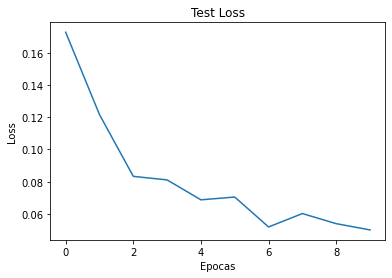

In [47]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Test Loss')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.show()

In [48]:
y_hat = model.predict(x_test)

In [50]:
y_hat_classes = np.argmax(y_hat, axis=1)

In [52]:
y_real_classes =  np.argmax(y_test, axis=1)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cmf = confusion_matrix(y_real_classes, y_hat_classes)

Text(0.5, 1.0, 'Confusion Matrix')

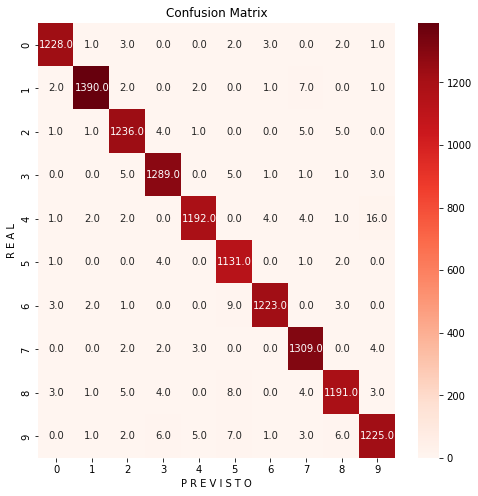

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(cmf, annot=True, fmt='.1f', cmap='Reds', linecolor='gray')
plt.xlabel('P R E V I S T O')
plt.ylabel('R E A L')
plt.title('Confusion Matrix')